<a href="https://colab.research.google.com/github/Ansebi/Reading_HDF_geodata/blob/main/Reading_HDF_geodata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rioxarray --quiet

In [ ]:
!pip install geopandas --quiet

     |████████████████████████████████| 1.1 MB 15.8 MB/s 
     |████████████████████████████████| 16.6 MB 70.8 MB/s 


In [ ]:
!pip install earthpy --quiet

     |████████████████████████████████| 1.4 MB 22.4 MB/s 


In [ ]:
# Import packages
import os
import warnings

import matplotlib.pyplot as plt
import numpy.ma as ma
import xarray as xr
import rioxarray as rxr
from shapely.geometry import mapping, box
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

warnings.simplefilter('ignore')

# Get the MODIS data
et.data.get_data('cold-springs-modis-h4')

# This download contains the fire boundary
et.data.get_data('cold-springs-fire')

Extracted output to /root/earth-analytics/data/cold-springs-modis-h4/.
Extracted output to /root/earth-analytics/data/cold-springs-fire/.


'/root/earth-analytics/data/cold-springs-fire/.'

In [ ]:
# Set working directory
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

In [ ]:
/root/earth-analytics/data/cold-springs-modis-h4/07_july_2016/MOD09GA.A2016189.h09v05.006.2016191073856.hdf

In [ ]:
# Create a path to the pre-fire MODIS h4 data
modis_pre_path = os.path.join("cold-springs-modis-h4",
                              "07_july_2016",
                              "MOD09GA.A2016189.h09v05.006.2016191073856.hdf")
modis_pre_path

'cold-springs-modis-h4/07_july_2016/MOD09GA.A2016189.h09v05.006.2016191073856.hdf'

In [ ]:
!pip install python-hdf4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 20.8 MB/s 
  Created wheel for python-hdf4: filename=python_hdf4-0.9.2-cp38-cp38-linux_x86_64.whl size=256573 sha256=b756d1d3ccae5103fb1ba95d1ddc267cc9600b5e1f5becf5c134c77b68c2ec28
  Stored in directory: /root/.cache/pip/wheels/df/7d/7d/cc36a9a5dc003d58fd0d5bc916a7def241aed38a9e3ea0df9c
Successfully built python-hdf4


In [ ]:
from pyhdf.SD import SD, SDC

In [ ]:
sd = SD(modis_pre_path, SDC.READ)

In [ ]:
sd.datasets()

{'num_observations_1km': (('YDim:MODIS_Grid_1km_2D', 'XDim:MODIS_Grid_1km_2D'),
  (1200, 1200),
  20,
  0),
 'state_1km_1': (('YDim:MODIS_Grid_1km_2D', 'XDim:MODIS_Grid_1km_2D'),
  (1200, 1200),
  23,
  1),
 'SensorZenith_1': (('YDim:MODIS_Grid_1km_2D', 'XDim:MODIS_Grid_1km_2D'),
  (1200, 1200),
  22,
  2),
 'SensorAzimuth_1': (('YDim:MODIS_Grid_1km_2D', 'XDim:MODIS_Grid_1km_2D'),
  (1200, 1200),
  22,
  3),
 'Range_1': (('YDim:MODIS_Grid_1km_2D', 'XDim:MODIS_Grid_1km_2D'),
  (1200, 1200),
  23,
  4),
 'SolarZenith_1': (('YDim:MODIS_Grid_1km_2D', 'XDim:MODIS_Grid_1km_2D'),
  (1200, 1200),
  22,
  5),
 'SolarAzimuth_1': (('YDim:MODIS_Grid_1km_2D', 'XDim:MODIS_Grid_1km_2D'),
  (1200, 1200),
  22,
  6),
 'gflags_1': (('YDim:MODIS_Grid_1km_2D', 'XDim:MODIS_Grid_1km_2D'),
  (1200, 1200),
  21,
  7),
 'orbit_pnt_1': (('YDim:MODIS_Grid_1km_2D', 'XDim:MODIS_Grid_1km_2D'),
  (1200, 1200),
  20,
  8),
 'granule_pnt_1': (('YDim:MODIS_Grid_1km_2D', 'XDim:MODIS_Grid_1km_2D'),
  (1200, 1200),
  21,


In [ ]:
lai = sd.select('Lai_500m')

In [ ]:
lai.dimensions()

{'YDim:MOD_Grid_MOD15A2H': 2400, 'XDim:MOD_Grid_MOD15A2H': 2400}

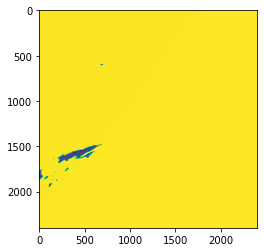

In [ ]:
from matplotlib.pyplot import imshow
imshow(lai.get())

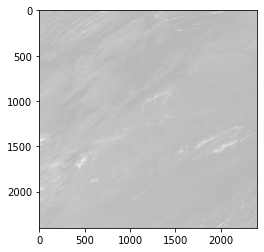

In [ ]:
imshow(sd.select('sur_refl_b01_1').get(), cmap='gray')